# Effetto della *prior*

Negli esempi precedenti abbiamo considerato la probabilità a priori $\pi(\theta)$ costante. Questo non è sempre una scelta legittima.

Nel seguito, replichiamo il codice già considerato per l'inferenza di $N$ misure di una variabile esponenziale.

In [1]:
import matplotlib.pyplot as plt
from scipy.stats import expon
import scipy.integrate as integrate
import numpy as np
import math

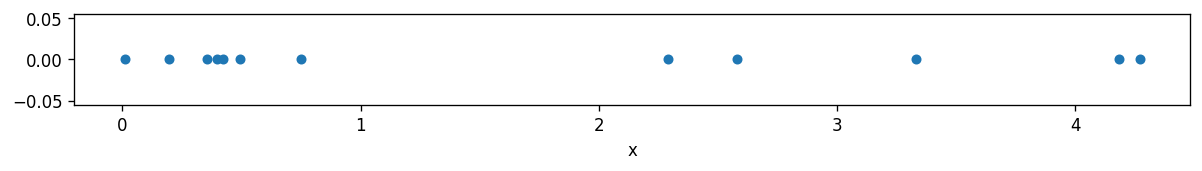

In [2]:
lam = 0.4
x_obs = expon.rvs(scale=1/lam, size=12)
plt.figure(figsize=(12,1), dpi=120)
plt.plot(x_obs, np.zeros(len(x_obs)), '.', markersize=10)
plt.xlabel('x')
plt.show()

In [3]:
x_sum=x_obs.sum()
x_size = len(x_obs)

In [4]:
def like_exp(lam):
    return math.pow(lam,x_size)*math.exp(-lam*x_sum)
norm_const = integrate.quad(like_exp, 0, 12)[0]
def post_exp(lam):
    return like_exp(lam)/norm_const

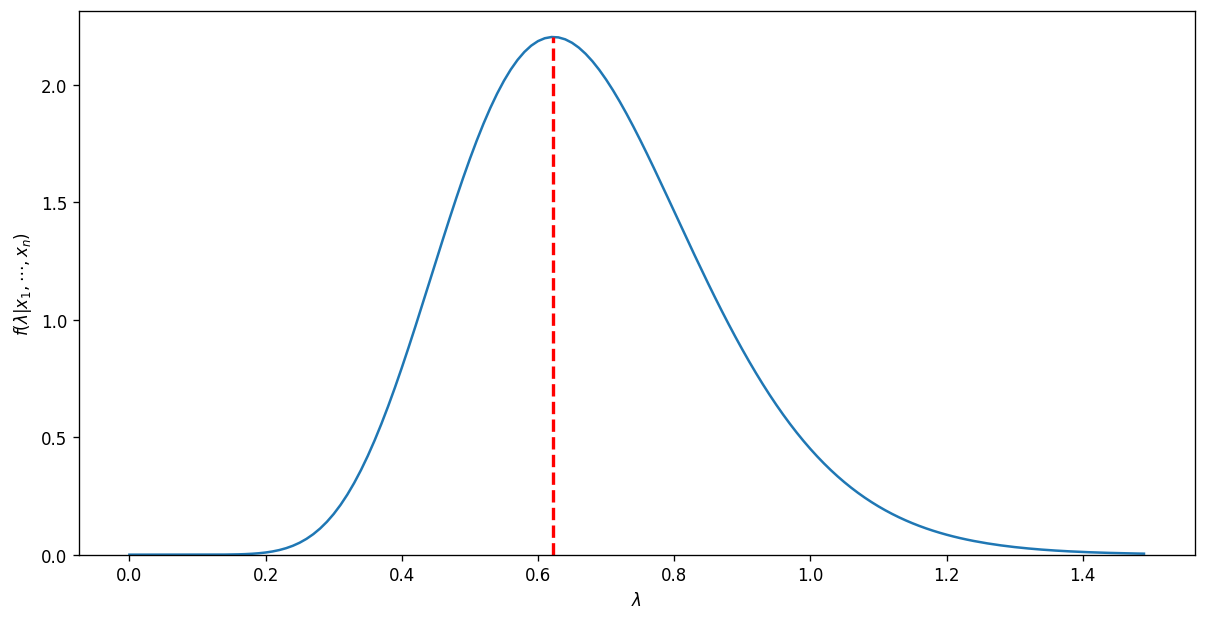

In [5]:
plt.figure(figsize=(12,6), dpi=120)
lam_range=np.arange(0, 1.5, 0.01)
post_exp_v = np.vectorize(post_exp)
plt.plot(lam_range, post_exp_v(lam_range))
lam0 = 1/x_obs.mean()
plt.plot([lam0,lam0], [0,post_exp(lam0)], color='red', linewidth=2, linestyle='--')
plt.ylim(bottom=0)
plt.xlabel('$\lambda$')
plt.ylabel('$f(\lambda|x_1,\cdots,x_n)$')
plt.show()

Immaginiamo di cambiare parametrizzazione. Se inizialmente abbiamo:

$p(x;\lambda) = \lambda e^{-\lambda x}$

possiamo passare a:

$\displaystyle p(x;\tau) = \frac{1}{\tau} e^{- x/\tau}$

Non c'è motivo di scegliere una parametrizzazione rispetto all'altra.

Se scegliamo la seconda parametrizzazione e prendiamo una *prior* uniforme in $\tau$,
questo equivale a scegliere una prior non uniforme rispetto a $\lambda$.

Se scegliessimo una prior uniforme rispetto a $\tau=1/\lambda$ avremmo:

$\displaystyle \frac{\mathrm{d}P}{\mathrm{d}\tau} = \mathrm{const.} = \frac{\mathrm{d}P}{\mathrm{d}\lambda}\left|\frac{\mathrm{d}\lambda}{\mathrm{d}\tau}\right|$

Quindi:

$\displaystyle \frac{\mathrm{d}P}{\mathrm{d}\lambda}\propto \left|\frac{\mathrm{d}\tau}{\mathrm{d}\lambda}\right| = \left|\frac{\mathrm{d}(1/\lambda)}{\mathrm{d}\lambda}\right| = \left|-\frac{1}{\lambda^2}\right| = \frac{1}{\lambda^2}$

Se, con una prior uniforme, abbiamo:

$\displaystyle p(\lambda; x_1, \cdots, x_n) = C \lambda^n \exp(-n\lambda\bar{x})$,

con una prior proporzionale a $1/\lambda^2$ abbiamo:

$\displaystyle p(\lambda; x_1, \cdots, x_n) = C^\prime \lambda^{n-2} \exp(-n\lambda\bar{x})$.

Mentre con la prior uniforme il valore più probabile è $\hat{\lambda} = 1/\,\overline{x}$, con la prior proporzionale a $1/\lambda^2$ si può dimostrare che il valore più probabile diventa, a causa del fattore addizionale $\lambda^{-2}$ nella PDF a posteriori:

$\displaystyle\hat{\lambda} = \frac{N-2}{N}\frac{1}{\bar{x}}$



In [6]:
def like_exp_p(lam):
    return math.pow(lam,x_size-2)*math.exp(-lam*x_sum)
norm_const_p = integrate.quad(like_exp_p, 0, 12)[0]
def post_exp_p(lam):
    return like_exp_p(lam)/norm_const_p

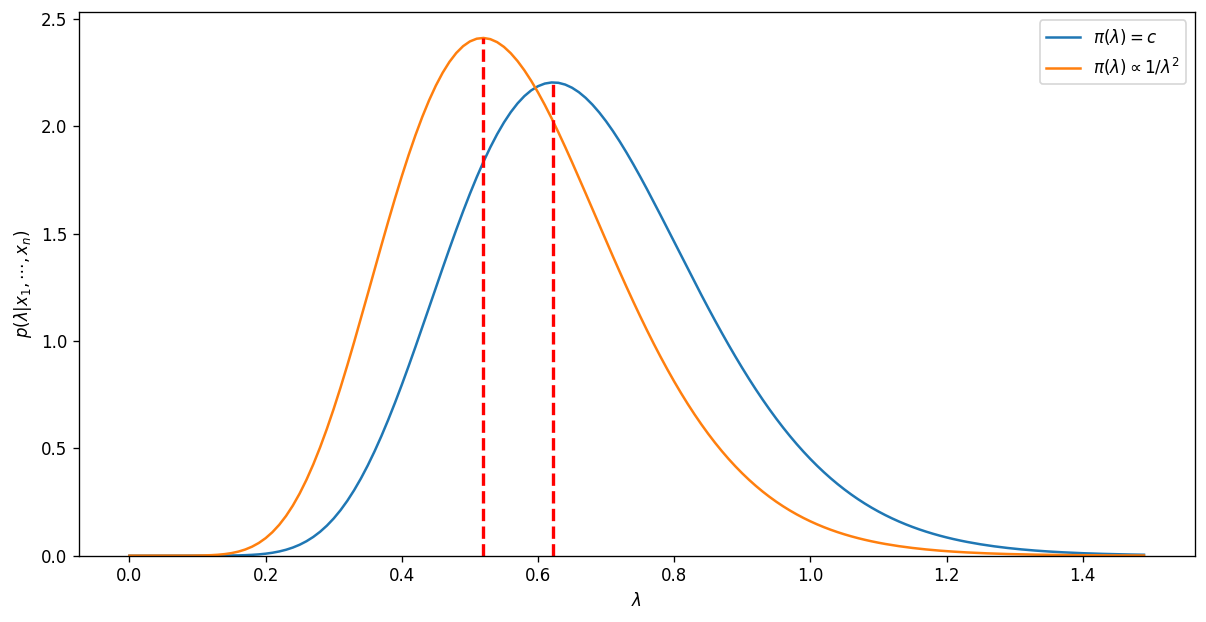

In [7]:
plt.figure(figsize=(12,6), dpi=120)
lam_range=np.arange(0, 1.5, 0.01)
post_exp_p_v = np.vectorize(post_exp_p)
plt.plot(lam_range, post_exp_v(lam_range), label="$\pi(\lambda)=c$")
plt.plot(lam_range, post_exp_p_v(lam_range), label="$\pi(\lambda)\propto 1/\lambda^2$")
lam0 = 1/x_obs.mean()
lam1 = (x_size-2)/x_obs.mean()/x_size
plt.plot([lam0,lam0], [0,post_exp(lam0)], color='red', linewidth=2, linestyle='--')
plt.plot([lam1,lam1], [0,post_exp_p(lam1)], color='red', linewidth=2, linestyle='--')
plt.ylim(bottom=0)
plt.legend()
plt.xlabel('$\lambda$')
plt.ylabel('$p(\lambda|x_1,\cdots,x_n)$')
plt.show()

## Discussione

Una distribuzione esponenziale può essere parametrizzata in due modi:
    
$\displaystyle f_\lambda(x;\lambda) = \lambda\,e^{-\lambda x}$

$\displaystyle f_\tau(x;\tau) = \frac{1}{\tau}e^{-x/\tau}$

Non esiste alcun principio fondamentale per il quale l'*ignoranza* sul parametro libero debba essere descritta da una PDF a priori unforme per $\lambda$ oppure per $\tau$.

Non esiste quindi alcun principio che porti a preferire una PDF a priori rispetto all'altra.

Questo rappresenta un problema per l'inferenza bayesiana: la **dipendenza da un'assunzione soggettiva** resta un ingrediente indispensabile di questo approccio.

Esistono approcci per tentare di risolvere questo problema (es.: Jeffreys prior) che però esulano da questo corso introduttivo. Anche questi approcci, però, non sono del tutto risolutivi.

Sopravvivono tutt'oggi accese discussioni che coprono tutto lo spettro dei possibili punti di vista che vanno dal considerare l'approccio bayesiano il vero ed unico fondamento della statistica e del metodo scientifico, fino alla necessità si abolirne l'uso per risultati scientifici perché i risultati soffrono di scelte arbitrarie.

La verità sta nel mezzo: l'approccio bayesiano è fortemente legato all'approccio scientifico, ma ha dei limiti dovuti alla sensibilità da elementi soggettivi.

## Sensibilità alla prior

All'aumentare del numero di misure $N$, in generale, la funzione di verosimiglianza avrà una distribuzione sempre più *piccata* intorno al valore più probabile.

In questo caso, moltiplicare un picco molto stretto per una PDF a priori $\pi(\theta)$ che è più regolare permette di considerare, nell'intervallo in cui la funzione di verosimiglianza è abbastanza lontana dallo zero, $\pi(\theta)$ all'incirca costante:

$\displaystyle p(\theta;x_0) = 
\frac{f(x_0;\theta)\,\pi(\theta)}{\int f(x_0;\theta^\prime)\,\pi(\theta^\prime)\,\mathrm{d}\theta^\prime} \simeq 
\frac{f(x_0;\theta)\,\pi(\hat{\theta})}{\int f(x_0;\theta^\prime)\,\pi(\hat{\theta})\,\mathrm{d}\theta^\prime} = 
\frac{f(x_0;\theta)\,\pi(\hat{\theta})}{\pi(\hat{\theta})\int f(x_0;\theta^\prime)\,\mathrm{d}\theta^\prime} = 
\frac{f(x_0;\theta)}{\int f(x_0;\theta^\prime)\,\mathrm{d}\theta^\prime}
$

In questo limite, la PDF a posteriori **non** dipende da alcuna PDF a priori!

# Spunti per esercizi
* provare ad usare un'altra PDF a priori a scelta diversa da quelle considerate finore (uniforme, $\propto 1/\lambda^2$)